# Week1
diabetes 데이터에 대해 1d-CNN을 적용하여 classification과 Regression을 진행한다.

이때, timeseries data에 CNN을 적용하기 위해 sequence_split함수가 선행되어야 한다.

## Data Preprocessing

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.shape

(768, 9)

In [28]:
# 결측치 확인
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
'''
    Pregnancies: 임신 횟수
    Glucose: 포도당 수치
    BloodPressure: 혈압
    SkinThickness: 피부 두께
    Insulin: 인슐린 수치
    BMI: 체질량지수 (BMI)
    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수
    Age: 나이
    Outcome: 결과 (당뇨병 여부)
'''

'\n    Pregnancies: 임신 횟수\n    Glucose: 포도당 수치\n    BloodPressure: 혈압\n    SkinThickness: 피부 두께\n    Insulin: 인슐린 수치\n    BMI: 체질량지수 (BMI)\n    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수\n    Age: 나이\n    Outcome: 결과 (당뇨병 여부)\n'

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_10720\1589747868.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


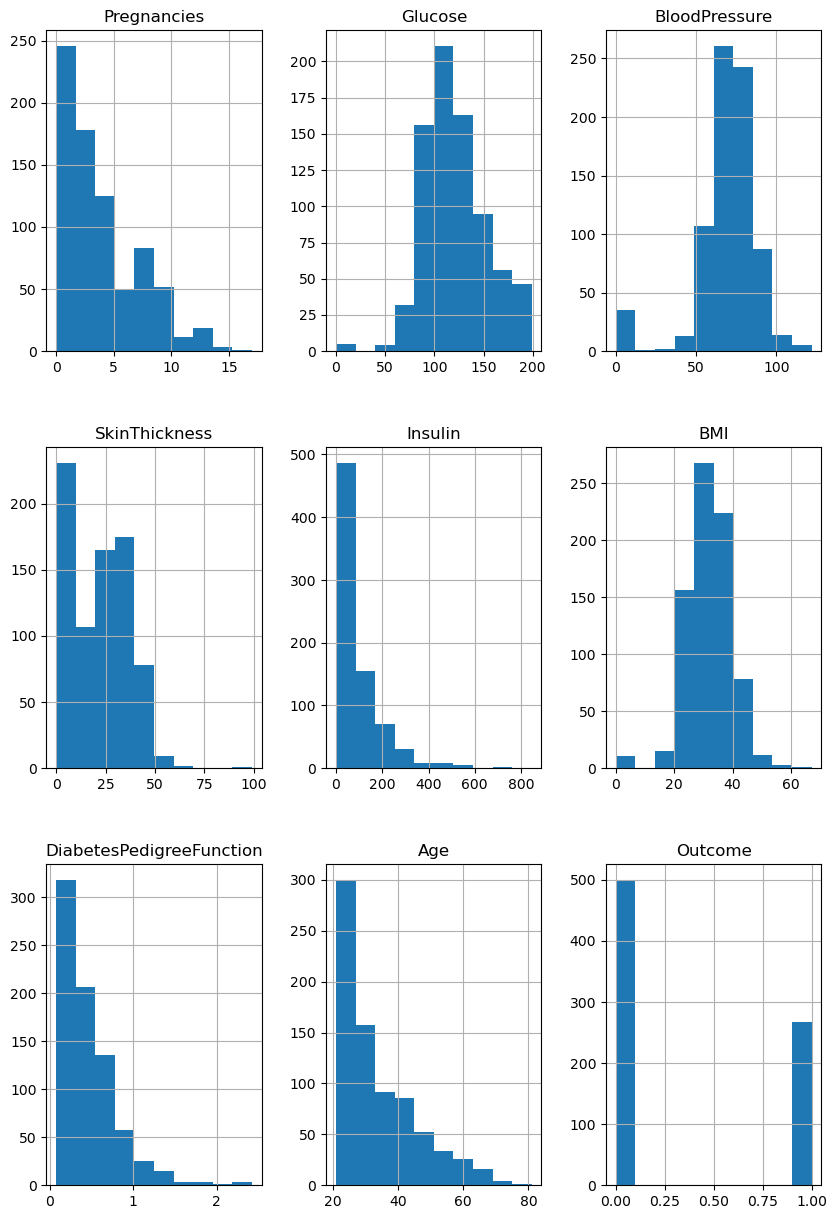

In [34]:
# 시각화
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [38]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

Text(0.5, 1.0, 'Outcome')

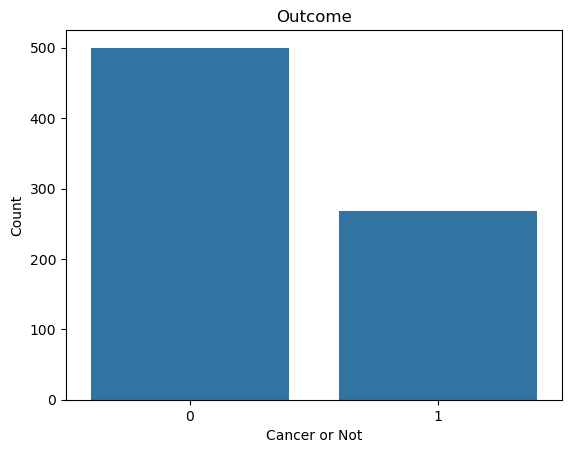

In [40]:
# 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [42]:
# Outcome 개수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [548]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [550]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = 0.25, stratify=y, random_state = 0)

In [552]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Sequence Split

In [555]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

split_sequence 함수를 통해 앞의 10명 데이터를 사용해 다음 데이터에 대한 당뇨 여부를 확인하도록 구성해보자.

In [558]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

In [560]:
X_train, y_train = split_sequences(train_set, 10)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 10)
print(X_test.shape, y_test.shape)   

(567, 10, 8) (567,)
(183, 10, 8) (183,)


In [562]:
# One-Hot Encode
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

## Classification
### Structure model

In [597]:
# classifier
from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout

n_timestemps, n_feautes, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

classifier = keras.Sequential()
classifier.add(Input(shape=(n_timestemps,n_feautes)))

# convolution layer
classifier.add(Conv1D(64, kernel_size=5, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

classifier.add(Conv1D(32, kernel_size=3, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

classifier.add(Conv1D(8, kernel_size=3, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

# output layer
classifier.add(Flatten())
classifier.add(Dense(2, activation='sigmoid'))

In [599]:
# optimizer, lossfunction
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [601]:
# keras.utils.plot_model(model)
classifier.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_91 (Conv1D)                   │ (None, 10, 64)              │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_91 (MaxPooling1D)      │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_92 (Conv1D)                   │ (None, 5, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_92 (MaxPooling1D)      │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_93 (Conv1D)                   │ (None, 3, 8)                │             776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_93 (MaxPooling1D)      │ (None, 2, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_39 (Flatten)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,610 (37.54 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

In [603]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = classifier.fit(X_train, y_train_onehot, validation_split=0.1, 
                    epochs=30, callbacks=[early_stopping_cb])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6216 - loss: 0.6486 - val_accuracy: 0.5965 - val_loss: 0.6848
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6685 - loss: 0.5863 - val_accuracy: 0.5789 - val_loss: 0.6389
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8143 - loss: 0.5040 - val_accuracy: 0.6842 - val_loss: 0.6294
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7870 - loss: 0.4754 - val_accuracy: 0.6842 - val_loss: 0.6306
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8366 - loss: 0.4266 - val_accuracy: 0.7368 - val_loss: 0.6216
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8758 - loss: 0.3720 - val_accuracy: 0.6842 - val_loss: 0.6430
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8706 - loss: 0.3405 - val_accuracy: 0.7368 - val_loss: 0.6437


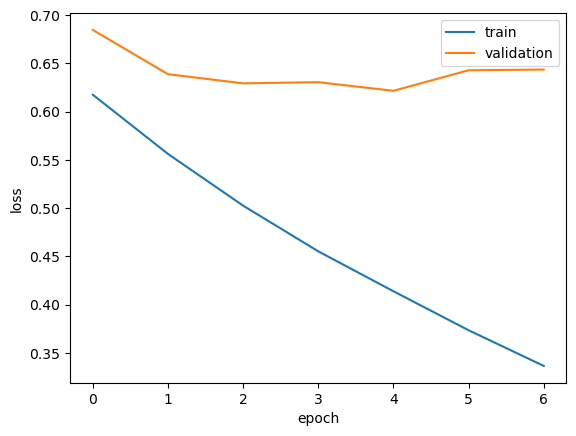

In [605]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [607]:
early_stopping_cb.stopped_epoch

6

In [609]:
classifier.evaluate(X_test, y_test_onehot)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.5114 


[0.5186828374862671, 0.7322404384613037]

## Regression
### Structure model

In [898]:
X = df.drop(['BMI', 'Outcome'], axis=1)
y = df['BMI']

In [900]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [902]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [904]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

In [906]:
X_train, y_train = split_sequences(train_set, 10)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 10)
print(X_test.shape, y_test.shape)   

(605, 10, 7) (605,)
(145, 10, 7) (145,)


In [908]:
# One-Hot Encode
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [910]:
# regressor
n_timestemps, n_feautes, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

regressor = keras.Sequential()
regressor.add(Input(shape=(n_timestemps,n_feautes)))

# convolution layer
regressor.add(Conv1D(64, kernel_size=5, activation='relu', padding='same'))
regressor.add(MaxPooling1D(2, padding='same'))
regressor.add(Dropout(0.1))

regressor.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
regressor.add(MaxPooling1D(2, padding='same'))
regressor.add(Dropout(0.1))

# output layer
regressor.add(Flatten())
regressor.add(Dense(1))

In [912]:
# optimizer, lossfunction
regressor.compile(loss='mse', metrics=['mse'])

In [914]:
# keras.utils.plot_model(model)
regressor.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_126 (Conv1D)                  │ (None, 10, 64)              │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_124 (MaxPooling1D)     │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_127 (Conv1D)                  │ (None, 5, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_125 (MaxPooling1D)     │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_55 (Flatten)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [916]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = regressor.fit(X_train, y_train, validation_split=0.1, batch_size=32,
                    epochs=100, callbacks=[early_stopping_cb])

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1026.7400 - mse: 1026.7400 - val_loss: 734.0148 - val_mse: 734.0148
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 634.1773 - mse: 634.1773 - val_loss: 338.0554 - val_mse: 338.0554
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 244.5122 - mse: 244.5122 - val_loss: 108.6526 - val_mse: 108.6526
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78.6638 - mse: 78.6638 - val_loss: 83.8021 - val_mse: 83.8021
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.9453 - mse: 66.9453 - val_loss: 78.8730 - val_mse: 78.8730
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.8755 - mse: 62.8755 - val_loss: 79.0955 - val_mse: 79.0955
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.6960 - mse: 49.6960 - val_loss: 71.8891 - val_mse: 71.8891
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.7896 - mse: 52.7896 - val_loss: 67.6009 - val_mse: 67.6009
Epoch 9/100
17/17

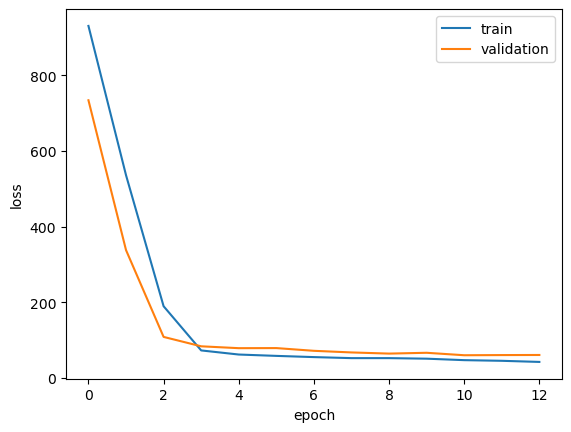

In [917]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [920]:
early_stopping_cb.stopped_epoch

12

In [922]:
regressor.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.8014 - mse: 42.8014 


[41.677764892578125, 41.677764892578125]